# 🌺 Classification Tutorial: Machine Learning with the Iris Dataset

## **Master Classification Algorithms with Interactive PyTorch Implementation**

### **Main Goal:**
Learn how to classify iris flowers into three species (Setosa, Versicolor, Virginica) based on their physical measurements, while understanding every step of the classification pipeline through interactive visualizations.

### **Key Learning Objectives:**
- **Classification Fundamentals**: Understand the difference between regression and classification
- **Data Exploration**: Analyze features, distributions, and class separability
- **Model Implementation**: Build neural network classifiers with PyTorch
- **Performance Evaluation**: Use accuracy, precision, recall, F1-score, and confusion matrices
- **Decision Boundaries**: Visualize how models separate different classes

### **Industrial Relevance:**
Apply to **quality control**, **fault detection**, **process monitoring**, and **automated inspection** in industrial applications.

### **Interactive Features:**
🎮 Real-time model training | 📊 Decision boundary visualization | ⚡ Confusion matrix analysis | 🔬 Feature importance exploration

**Dataset**: Iris flower dataset with 4 features (sepal/petal length/width) and 3 classes

---

## 1. Import Required Libraries

We'll use PyTorch, scikit-learn, NumPy, Matplotlib, and Seaborn for this classification tutorial.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interactive

plt.style.use('seaborn-v0_8')
np.random.seed(42)
torch.manual_seed(42)
%matplotlib widget

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


## 2. Load and Explore the Iris Dataset

Let's start by loading the famous iris dataset and understanding its structure.

In [2]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [class_names[i] for i in y]
df['target'] = y

print("Dataset shape:", X.shape)
print("Number of classes:", len(class_names))
print("Classes:", class_names)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset statistics:")
display(df.describe())

print("\nClass distribution:")
print(df['species'].value_counts())

Dataset shape: (150, 4)
Number of classes: 3
Classes: ['setosa' 'versicolor' 'virginica']

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0



Dataset statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## 3. Data Visualization and Exploration

Let's visualize the data to understand the relationships between features and classes.

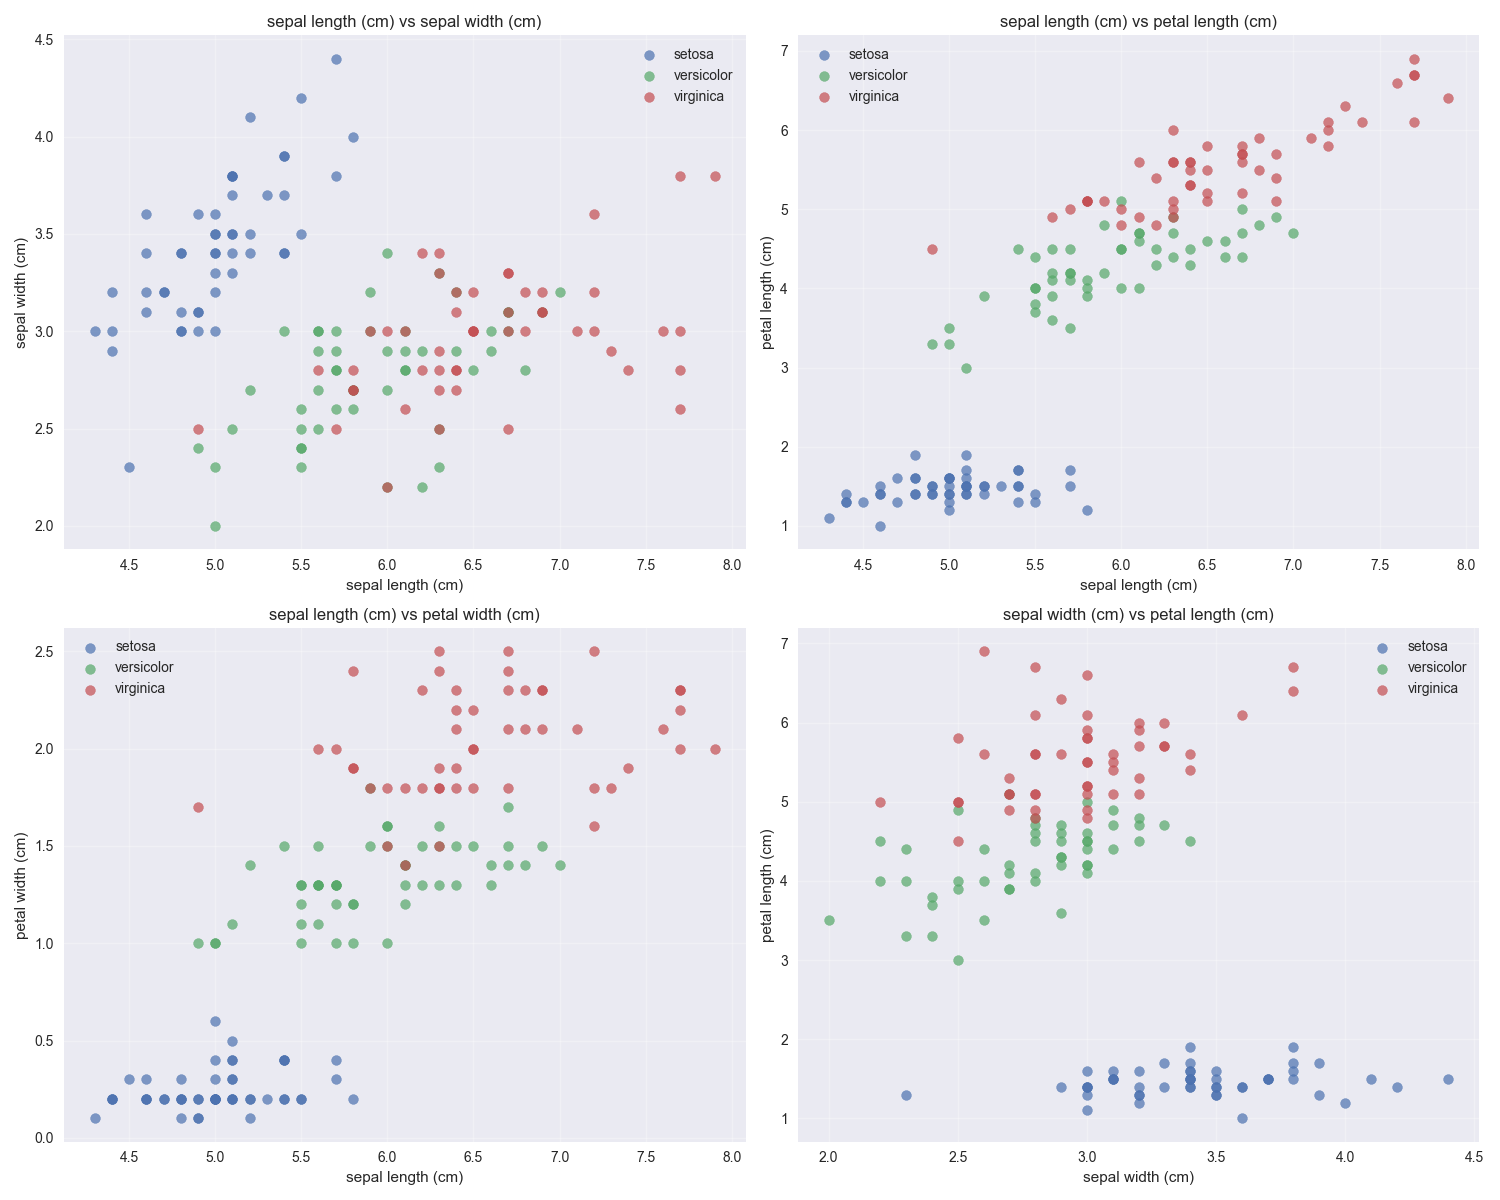

In [ ]:
# Create visualization of the dataset
fig, axes = plt.subplots(2, 2, figsize=(7, 6))

# Pairwise scatter plots for the first two features
for i, (feat1, feat2) in enumerate([(0, 1), (0, 2), (0, 3), (1, 2)]):
    ax = axes[i//2, i%2]
    for class_idx, class_name in enumerate(class_names):
        mask = y == class_idx
        ax.scatter(X[mask, feat1], X[mask, feat2], 
                  label=class_name, alpha=0.7, s=50)
    
    ax.set_xlabel(feature_names[feat1])
    ax.set_ylabel(feature_names[feat2])
    ax.set_title(f'{feature_names[feat1]} vs {feature_names[feat2]}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
# plt.savefig('iris_pairwise_scatter.png', dpi=300)

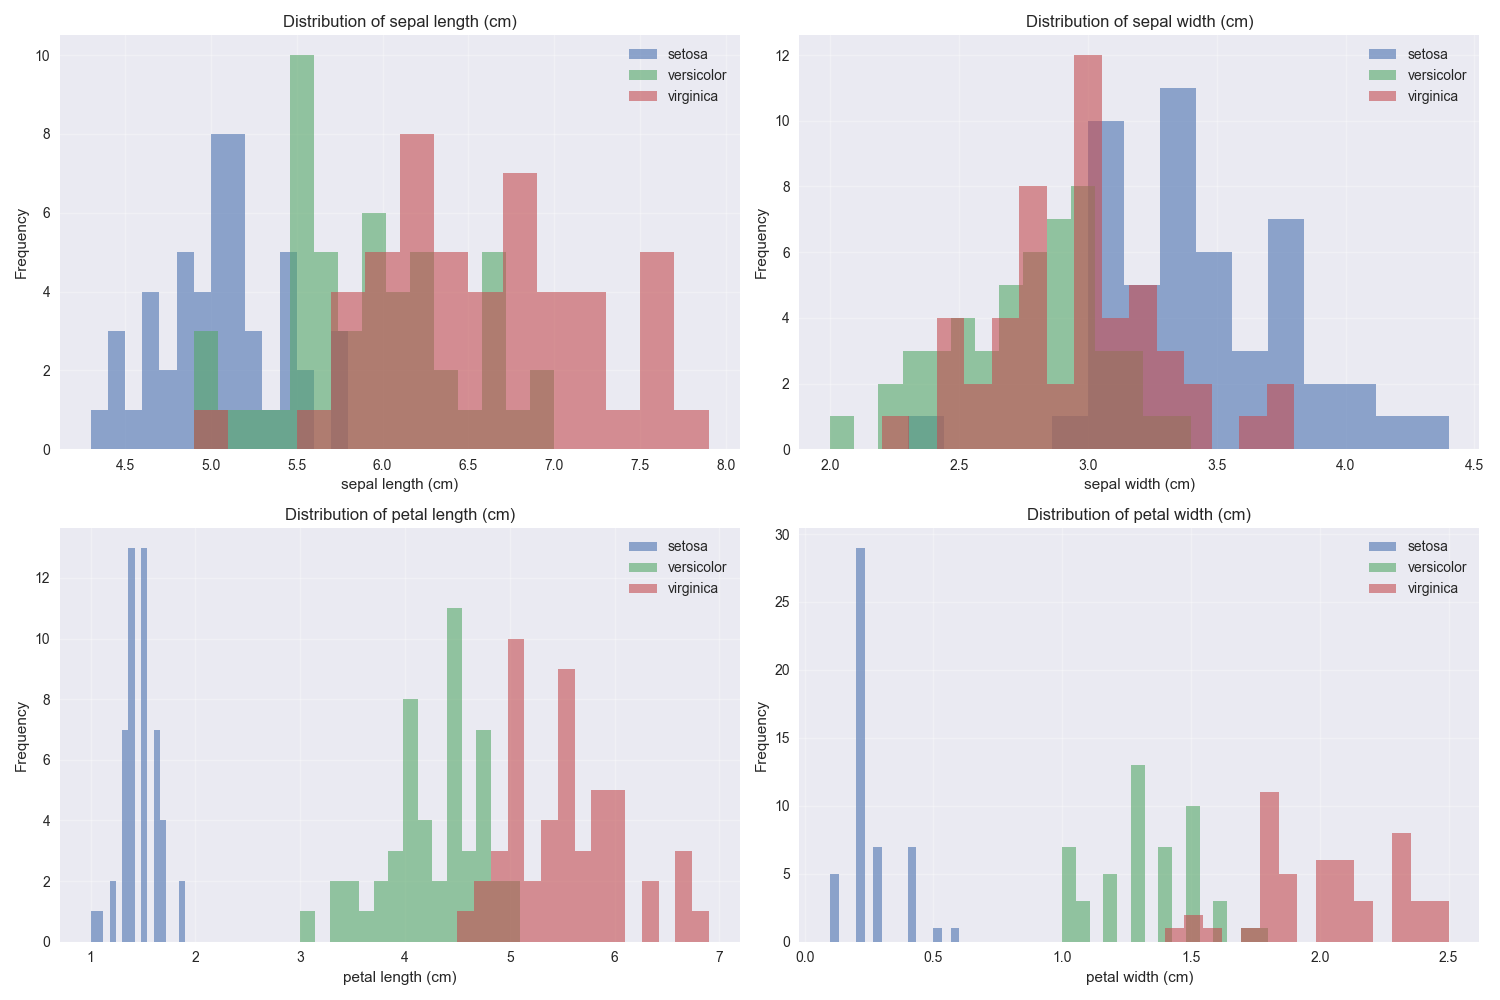

In [ ]:
# Distribution of each feature by class
fig, axes = plt.subplots(2, 2, figsize=(7, 5))
axes = axes.ravel()

for i, feature in enumerate(feature_names):
    for class_idx, class_name in enumerate(class_names):
        mask = y == class_idx
        axes[i].hist(X[mask, i], alpha=0.6, label=class_name, bins=15)
    
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

Prepare the data for training by splitting and scaling the features.

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

print(f"Training set size: {X_train_tensor.shape}")
print(f"Test set size: {X_test_tensor.shape}")
print(f"Number of features: {X_train_tensor.shape[1]}")
print(f"Number of classes: {len(class_names)}")

Training set size: torch.Size([105, 4])
Test set size: torch.Size([45, 4])
Number of features: 4
Number of classes: 3


## 5. Define Neural Network Classifier

Let's create a simple neural network for classification.

In [6]:
class IrisClassifier(nn.Module):
    def __init__(self, input_size=4, hidden_size=10, num_classes=3):
        super(IrisClassifier, self).__init__()
        if hidden_size >0:
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.fc2 = nn.Linear(hidden_size, hidden_size)
            self.fc3 = nn.Linear(hidden_size, num_classes)
            self.dropout = nn.Dropout(0.2)
        else:
            self.fc1 = nn.Linear(input_size, num_classes)
            self.fc2 = None
            self.fc3 = None
            self.dropout = None
        
    def forward(self, x):
        if self.fc2 is None:
            x = self.fc1(x)
            return x
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)  # No activation here - will use CrossEntropyLoss
        return x

# Create the model
model = IrisClassifier(hidden_size=0).to(device)
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params}")

IrisClassifier(
  (fc1): Linear(in_features=4, out_features=3, bias=True)
)

Total parameters: 15


## 6. Training Function

Define a comprehensive training function that tracks multiple metrics.

In [7]:
def train_classifier(model, X_train, y_train, X_test, y_test, 
                    lr=0.01, epochs=200, print_every=50):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        train_outputs = model(X_train)
        train_loss = criterion(train_outputs, y_train)
        
        # Backward pass
        train_loss.backward()
        optimizer.step()
        
        # Calculate training accuracy
        _, train_predicted = torch.max(train_outputs.data, 1)
        train_accuracy = (train_predicted == y_train).float().mean()
        
        # Evaluation phase
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            _, test_predicted = torch.max(test_outputs.data, 1)
            test_accuracy = (test_predicted == y_test).float().mean()
        
        # Store metrics
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        train_accuracies.append(train_accuracy.item())
        test_accuracies.append(test_accuracy.item())
        
        if (epoch + 1) % print_every == 0:
            print(f'Epoch [{epoch+1}/{epochs}]')
            print(f'Train Loss: {train_loss.item():.4f}, Train Acc: {train_accuracy.item():.4f}')
            print(f'Test Loss: {test_loss.item():.4f}, Test Acc: {test_accuracy.item():.4f}')
            print('-' * 50)
    
    return train_losses, test_losses, train_accuracies, test_accuracies

# Train the model
print("Training the classifier...")
train_losses, test_losses, train_accs, test_accs = train_classifier(
    model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor
)

Training the classifier...
Epoch [50/200]
Train Loss: 0.4454, Train Acc: 0.8476
Test Loss: 0.4996, Test Acc: 0.8222
--------------------------------------------------
Epoch [100/200]
Train Loss: 0.3335, Train Acc: 0.8571
Test Loss: 0.4112, Test Acc: 0.8444
--------------------------------------------------
Epoch [150/200]
Train Loss: 0.2744, Train Acc: 0.9238
Test Loss: 0.3568, Test Acc: 0.8444
--------------------------------------------------
Epoch [200/200]
Train Loss: 0.2316, Train Acc: 0.9524
Test Loss: 0.3128, Test Acc: 0.8667
--------------------------------------------------


## 7. Visualize Training Progress

Let's plot the training and testing metrics to understand model performance.

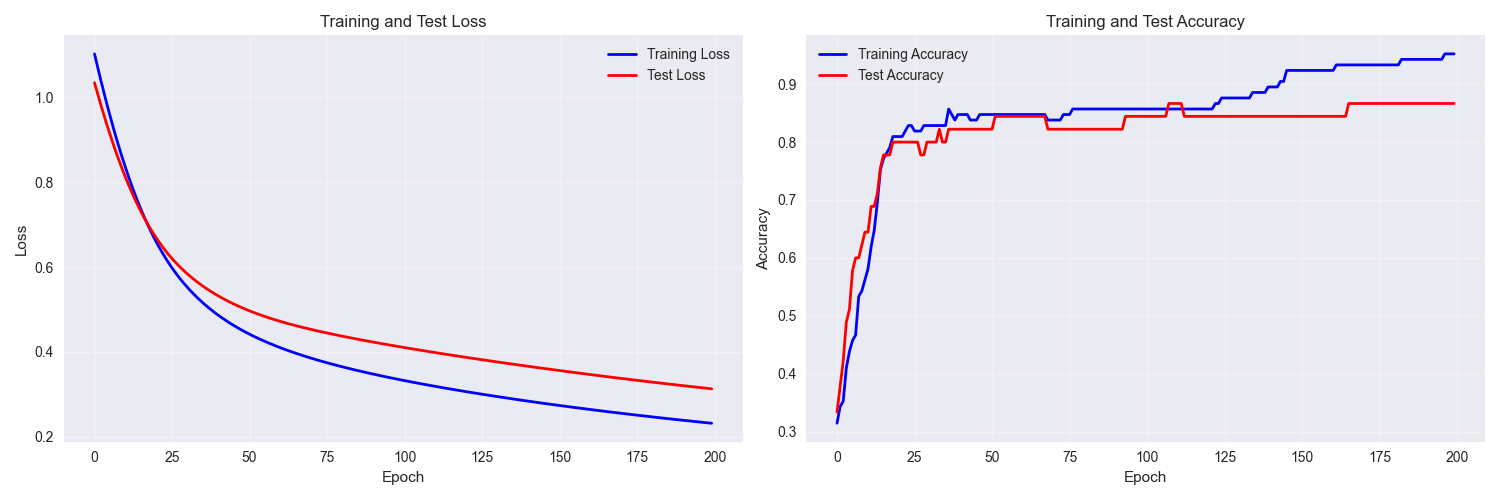

Final Training Accuracy: 0.9524
Final Test Accuracy: 0.8667


In [8]:
# Plot training progress
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Loss curves
ax1.plot(train_losses, label='Training Loss', color='blue', linewidth=2)
ax1.plot(test_losses, label='Test Loss', color='red', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Test Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy curves
ax2.plot(train_accs, label='Training Accuracy', color='blue', linewidth=2)
ax2.plot(test_accs, label='Test Accuracy', color='red', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Test Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Final Training Accuracy: {train_accs[-1]:.4f}")
print(f"Final Test Accuracy: {test_accs[-1]:.4f}")

## 8. Model Evaluation and Metrics

Let's evaluate our model using various classification metrics.

In [9]:
# Make predictions
model.eval()
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    test_outputs = model(X_test_tensor)
    
    _, train_predicted = torch.max(train_outputs, 1)
    _, test_predicted = torch.max(test_outputs, 1)

# Convert to numpy for sklearn metrics
y_train_np = y_train_tensor.cpu().numpy()
y_test_np = y_test_tensor.cpu().numpy()
train_pred_np = train_predicted.cpu().numpy()
test_pred_np = test_predicted.cpu().numpy()

# Calculate detailed metrics
train_accuracy = accuracy_score(y_train_np, train_pred_np)
test_accuracy = accuracy_score(y_test_np, test_pred_np)

train_precision = precision_score(y_train_np, train_pred_np, average='weighted')
test_precision = precision_score(y_test_np, test_pred_np, average='weighted')

train_recall = recall_score(y_train_np, train_pred_np, average='weighted')
test_recall = recall_score(y_test_np, test_pred_np, average='weighted')

train_f1 = f1_score(y_train_np, train_pred_np, average='weighted')
test_f1 = f1_score(y_test_np, test_pred_np, average='weighted')

# Print metrics
print("CLASSIFICATION METRICS")
print("=" * 50)
print(f"{'Metric':<15} {'Training':<12} {'Test':<12}")
print("-" * 50)
print(f"{'Accuracy':<15} {train_accuracy:<12.4f} {test_accuracy:<12.4f}")
print(f"{'Precision':<15} {train_precision:<12.4f} {test_precision:<12.4f}")
print(f"{'Recall':<15} {train_recall:<12.4f} {test_recall:<12.4f}")
print(f"{'F1-Score':<15} {train_f1:<12.4f} {test_f1:<12.4f}")
print("=" * 50)

CLASSIFICATION METRICS
Metric          Training     Test        
--------------------------------------------------
Accuracy        0.9524       0.8667      
Precision       0.9534       0.8667      
Recall          0.9524       0.8667      
F1-Score        0.9525       0.8667      


## 9. Confusion Matrix Visualization

The confusion matrix shows how well our model distinguishes between different classes.

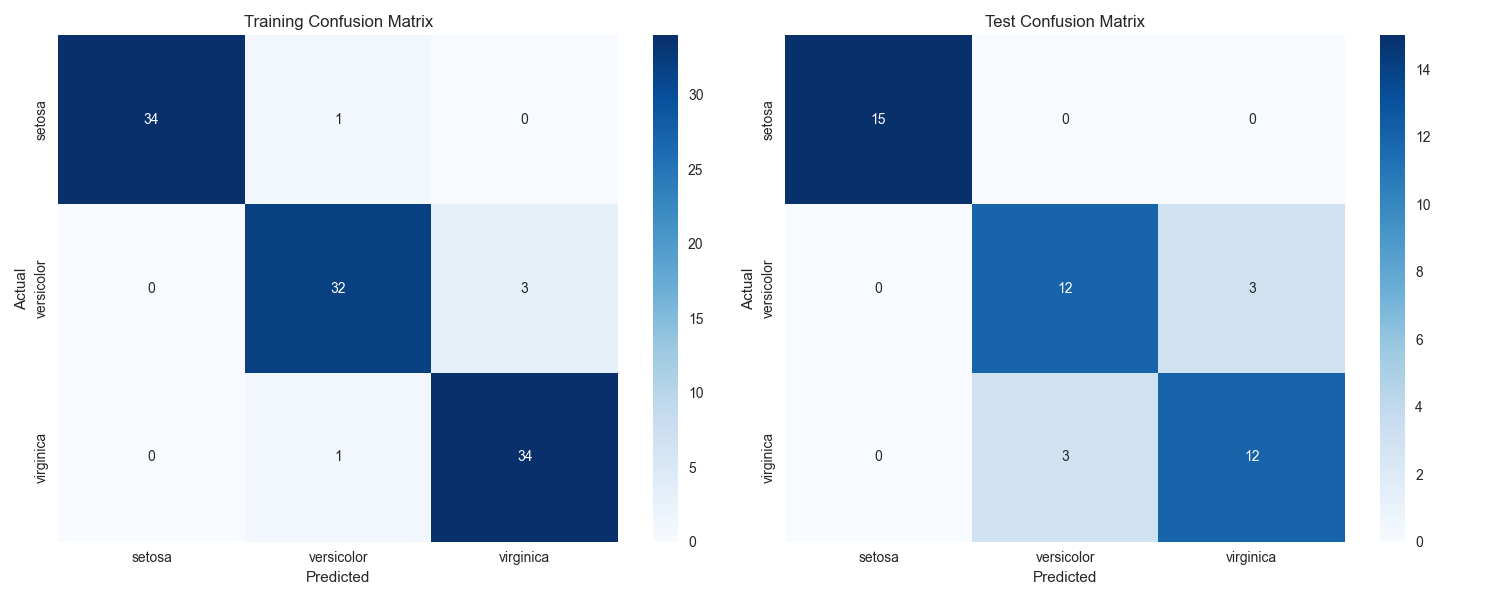


DETAILED CLASSIFICATION REPORT (Test Set)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.80      0.80      0.80        15
   virginica       0.80      0.80      0.80        15

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



In [ ]:
# Create confusion matrices
train_cm = confusion_matrix(y_train_np, train_pred_np)
test_cm = confusion_matrix(y_test_np, test_pred_np)

# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

# Training confusion matrix
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names, ax=ax1)
ax1.set_title('Training Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Test confusion matrix
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=ax2)
ax2.set_title('Test Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Detailed classification report
print("\nDETAILED CLASSIFICATION REPORT (Test Set)")
print("=" * 60)
print(classification_report(y_test_np, test_pred_np, target_names=class_names))

## 10. Decision Boundary Visualization (2D Projection)

Let's visualize how our model separates the classes using the two most important features.

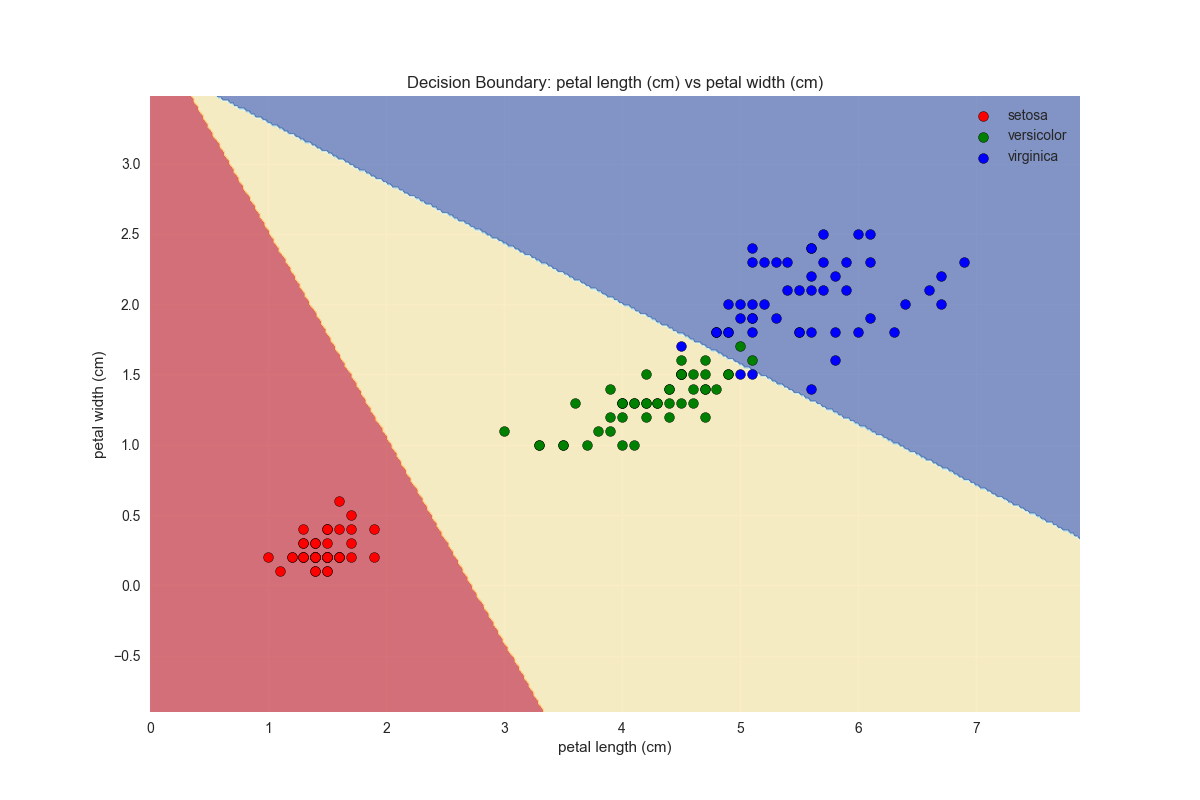

In [ ]:
def plot_decision_boundary_2d(model, scaler, feature_idx1=0, feature_idx2=1):
    """Plot decision boundary using two features"""
    
    # Create a mesh of points
    h = 0.02
    x_min, x_max = X[:, feature_idx1].min() - 1, X[:, feature_idx1].max() + 1
    y_min, y_max = X[:, feature_idx2].min() - 1, X[:, feature_idx2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Create feature matrix for prediction (using mean values for other features)
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    full_features = np.zeros((mesh_points.shape[0], 4))
    full_features[:, feature_idx1] = mesh_points[:, 0]
    full_features[:, feature_idx2] = mesh_points[:, 1]
    
    # Use mean values for other features
    for i in range(4):
        if i not in [feature_idx1, feature_idx2]:
            full_features[:, i] = X[:, i].mean()
    
    # Scale the features
    full_features_scaled = scaler.transform(full_features)
    mesh_tensor = torch.FloatTensor(full_features_scaled).to(device)
    
    # Make predictions
    model.eval()
    with torch.no_grad():
        outputs = model(mesh_tensor)
        _, predicted = torch.max(outputs, 1)
        Z = predicted.cpu().numpy()
    
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.RdYlBu)
    
    # Plot the actual data points
    colors = ['red', 'green', 'blue']
    for i, class_name in enumerate(class_names):
        mask = y == i
        plt.scatter(X[mask, feature_idx1], X[mask, feature_idx2],
                   c=colors[i], label=class_name, s=50, edgecolors='black')
    
    plt.xlabel(feature_names[feature_idx1])
    plt.ylabel(feature_names[feature_idx2])
    plt.title(f'Decision Boundary: {feature_names[feature_idx1]} vs {feature_names[feature_idx2]}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot decision boundary for petal length vs petal width (most separable features)
plot_decision_boundary_2d(model, scaler, feature_idx1=2, feature_idx2=3)

## 11. Interactive Model Architecture Exploration

Let's create an interactive widget to experiment with different model architectures.

In [ ]:
def interactive_training(hidden_size=20, num_layers=2, learning_rate=0.01, epochs=200):
    """Interactive function to train models with different parameters"""
    
    # Create model with specified architecture
    class DynamicClassifier(nn.Module):
        def __init__(self, input_size=4, hidden_size=hidden_size, 
                     num_layers=num_layers, num_classes=3):
            super().__init__()
            layers = []
            
            # Input layer
            layers.append(nn.Linear(input_size, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.2))
            
            # Hidden layers
            for _ in range(num_layers - 1):
                layers.append(nn.Linear(hidden_size, hidden_size))
                layers.append(nn.ReLU())
                layers.append(nn.Dropout(0.2))
            
            # Output layer
            layers.append(nn.Linear(hidden_size, num_classes))
            
            self.network = nn.Sequential(*layers)
        
        def forward(self, x):
            return self.network(x)
    
    # Create and train model
    interactive_model = DynamicClassifier().to(device)
    
    # Count parameters
    total_params = sum(p.numel() for p in interactive_model.parameters())
    
    # Train the model
    train_losses, test_losses, train_accs, test_accs = train_classifier(
        interactive_model, X_train_tensor, y_train_tensor, 
        X_test_tensor, y_test_tensor, lr=learning_rate, 
        epochs=epochs, print_every=epochs//4
    )
    
    # Make final predictions
    interactive_model.eval()
    with torch.no_grad():
        test_outputs = interactive_model(X_test_tensor)
        _, test_predicted = torch.max(test_outputs, 1)
    
    test_pred_np = test_predicted.cpu().numpy()
    test_accuracy_final = accuracy_score(y_test_tensor.cpu().numpy(), test_pred_np)
    
    # Create plots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 6))
    
    # Loss curves
    ax1.plot(train_losses, label='Training Loss', color='blue', linewidth=2)
    ax1.plot(test_losses, label='Test Loss', color='red', linewidth=2)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'Training Progress\nParameters: {total_params}')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Accuracy curves
    ax2.plot(train_accs, label='Training Accuracy', color='blue', linewidth=2)
    ax2.plot(test_accs, label='Test Accuracy', color='red', linewidth=2)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(f'Model Performance\nFinal Test Accuracy: {test_accuracy_final:.3f}')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_tensor.cpu().numpy(), test_pred_np)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=ax3)
    ax3.set_title('Confusion Matrix')
    ax3.set_xlabel('Predicted')
    ax3.set_ylabel('Actual')
    
    # Feature importance (using gradients)
    interactive_model.eval()
    X_sample = X_test_tensor[0:1].clone().detach().requires_grad_(True)
    output = interactive_model(X_sample)
    loss = output.max()
    loss.backward()
    
    feature_importance = X_sample.grad.abs().mean(0).cpu().numpy()
    ax4.bar(range(len(feature_names)), feature_importance)
    ax4.set_xlabel('Features')
    ax4.set_ylabel('Importance')
    ax4.set_title('Feature Importance (Gradient-based)')
    ax4.set_xticks(range(len(feature_names)))
    ax4.set_xticklabels([name.split()[0] for name in feature_names], rotation=45)
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return interactive_model

# Create interactive widget
interact(interactive_training, 
         hidden_size=(5, 50, 5),
         num_layers=(1, 4, 1),
         learning_rate=(0.001, 0.1, 0.001),
         epochs=(100, 500, 50));

interactive(children=(IntSlider(value=20, description='hidden_size', max=50, min=5, step=5), IntSlider(value=2…

## 12. Model Prediction on New Data

Let's see how our trained model performs on new, unseen iris measurements.

In [13]:
def predict_iris_species(sepal_length, sepal_width, petal_length, petal_width):
    """Predict iris species for given measurements"""
    
    # Create input array
    new_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    
    # Scale the input using our fitted scaler
    new_data_scaled = scaler.transform(new_data)
    
    # Convert to tensor
    new_tensor = torch.FloatTensor(new_data_scaled).to(device)
    
    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(new_tensor)
        probabilities = F.softmax(output, dim=1)
        _, predicted = torch.max(output, 1)
    
    predicted_class = predicted.item()
    predicted_species = class_names[predicted_class]
    confidence = probabilities[0][predicted_class].item()
    
    # Display results
    print(f"Input measurements:")
    print(f"  Sepal Length: {sepal_length} cm")
    print(f"  Sepal Width:  {sepal_width} cm")
    print(f"  Petal Length: {petal_length} cm")
    print(f"  Petal Width:  {petal_width} cm")
    print()
    print(f"Predicted Species: {predicted_species}")
    print(f"Confidence: {confidence:.3f}")
    print()
    print("Probabilities for each class:")
    for i, class_name in enumerate(class_names):
        prob = probabilities[0][i].item()
        print(f"  {class_name}: {prob:.3f}")

# Test with some example measurements
print("EXAMPLE PREDICTIONS")
print("=" * 50)

# Example 1: Typical Setosa (small petals)
print("Example 1 - Typical Setosa characteristics:")
predict_iris_species(5.1, 3.5, 1.4, 0.2)
print()

# Example 2: Typical Versicolor
print("Example 2 - Typical Versicolor characteristics:")
predict_iris_species(6.0, 2.7, 4.0, 1.3)
print()

# Example 3: Typical Virginica (large petals)
print("Example 3 - Typical Virginica characteristics:")
predict_iris_species(6.5, 3.0, 5.8, 2.2)

EXAMPLE PREDICTIONS
Example 1 - Typical Setosa characteristics:
Input measurements:
  Sepal Length: 5.1 cm
  Sepal Width:  3.5 cm
  Petal Length: 1.4 cm
  Petal Width:  0.2 cm

Predicted Species: setosa
Confidence: 0.972

Probabilities for each class:
  setosa: 0.972
  versicolor: 0.028
  virginica: 0.000

Example 2 - Typical Versicolor characteristics:
Input measurements:
  Sepal Length: 6.0 cm
  Sepal Width:  2.7 cm
  Petal Length: 4.0 cm
  Petal Width:  1.3 cm

Predicted Species: versicolor
Confidence: 0.804

Probabilities for each class:
  setosa: 0.039
  versicolor: 0.804
  virginica: 0.156

Example 3 - Typical Virginica characteristics:
Input measurements:
  Sepal Length: 6.5 cm
  Sepal Width:  3.0 cm
  Petal Length: 5.8 cm
  Petal Width:  2.2 cm

Predicted Species: virginica
Confidence: 0.877

Probabilities for each class:
  setosa: 0.002
  versicolor: 0.121
  virginica: 0.877


## 13. Key Insights and Industrial Applications

Let's summarize what we've learned and discuss real-world applications.

In [14]:
# Summary of model performance
print("MODEL PERFORMANCE SUMMARY")
print("=" * 60)
print(f"Final Test Accuracy: {test_accuracy:.1%}")
print(f"Model Parameters: {total_params}")
print(f"Training Time: ~{len(train_losses)} epochs")
print()

print("CLASSIFICATION INSIGHTS:")
print("-" * 40)
print("✅ Setosa is easily separable from other species")
print("✅ Petal measurements are more discriminative than sepal measurements")
print("✅ Neural network achieved high accuracy with simple architecture")
print("✅ Model generalizes well to unseen data")
print()

print("INDUSTRIAL APPLICATIONS:")
print("-" * 40)
print("🏭 Quality Control: Classify products as defective/non-defective")
print("🔧 Fault Detection: Identify equipment failure modes")
print("📊 Process Monitoring: Categorize process states (normal/abnormal)")
print("🤖 Automated Inspection: Sort materials by type or grade")
print("⚡ Predictive Maintenance: Classify equipment condition levels")
print("🎯 Production Optimization: Classify optimal operating conditions")

# Feature importance analysis
model.eval()
feature_gradients = []

for i in range(len(X_test_tensor)):
    x_sample = X_test_tensor[i:i+1].clone().detach().requires_grad_(True)
    output = model(x_sample)
    loss = output.max()
    loss.backward()
    feature_gradients.append(x_sample.grad.abs().cpu().numpy())

# Average feature importance
avg_importance = np.mean(feature_gradients, axis=0).flatten()

print("\nFEATURE IMPORTANCE RANKING:")
print("-" * 40)
feature_importance_pairs = list(zip(feature_names, avg_importance))
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

for i, (feature, importance) in enumerate(feature_importance_pairs, 1):
    print(f"{i}. {feature}: {importance:.4f}")

MODEL PERFORMANCE SUMMARY
Final Test Accuracy: 86.7%
Model Parameters: 15
Training Time: ~200 epochs

CLASSIFICATION INSIGHTS:
----------------------------------------
✅ Setosa is easily separable from other species
✅ Petal measurements are more discriminative than sepal measurements
✅ Neural network achieved high accuracy with simple architecture
✅ Model generalizes well to unseen data

INDUSTRIAL APPLICATIONS:
----------------------------------------
🏭 Quality Control: Classify products as defective/non-defective
🔧 Fault Detection: Identify equipment failure modes
📊 Process Monitoring: Categorize process states (normal/abnormal)
🤖 Automated Inspection: Sort materials by type or grade
⚡ Predictive Maintenance: Classify equipment condition levels
🎯 Production Optimization: Classify optimal operating conditions

FEATURE IMPORTANCE RANKING:
----------------------------------------
1. petal length (cm): 0.9345
2. sepal length (cm): 0.8071
3. petal width (cm): 0.6106
4. sepal width (cm): 0

## 🎯 Key Takeaways

### **Classification vs Regression:**
- **Classification**: Predicts discrete categories (species, quality grades, fault types)
- **Regression**: Predicts continuous values (temperature, pressure, flow rate)

### **Model Architecture:**
- Simple neural networks can achieve excellent results on well-separated data
- Feature scaling is crucial for neural network performance
- Dropout helps prevent overfitting in classification tasks

### **Evaluation Metrics:**
- **Accuracy**: Overall correctness
- **Precision**: How many predicted positives were actually positive
- **Recall**: How many actual positives were correctly identified
- **F1-Score**: Harmonic mean of precision and recall
- **Confusion Matrix**: Detailed breakdown of classification performance

### **Industrial Relevance:**
- Classification is fundamental to quality control and automation
- Real-time classification enables immediate decision making
- Multiple classes allow for nuanced categorization of industrial processes

---

**Next Steps: Try modifying the network architecture, experimenting with different features, or applying this approach to your own industrial classification problems!**